# Predicting SP500 Index

In this project, we work with data from the SP500 Index. The file is made available by DataQuest as a csv file containing index prices. Each row in the file contains a daily record of the price of the SP500 Index from 1950 to 2015. The dataset is stored in sphist.csv. Columns:

- Date -- The date of the record.
- Open -- The opening price of the day (when trading starts).
- High -- The highest trade price during the day.
- Low -- The lowest trade price during the day.
- Close -- The closing price for the day (when trading is finished).
- Volume -- The number of shares traded.
- Adj Close -- The daily closing price, adjusted retroactively to include any corporate actions.

## Data import and preparation

In [1]:
import pandas as pd
df = pd.read_csv('sphist.csv')

In [2]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

We convert the Date column from object (str) to datetime facilitate the later manipulation.

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume              float64
Adj Close           float64
dtype: object

In [5]:
#from datetime import datetime
#a = df["Date"] > datetime(year=2015, month=4, day=1)

In [6]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883


As we can see the rows are not sorted by date, we will fix this:

In [7]:
df = df.sort_values(by=['Date'])
# we reset the index and avoid the old index being added as a column
df = df.reset_index(drop=True)

In [8]:
df.head(10)

,Date,Open,High,Low,Close,Volume,Adj Close
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000.0,16.660000
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000.0,16.850000
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000.0,16.930000
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000.0,16.980000
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000.0,17.080000
5,1950-01-10,17.030001,17.030001,17.030001,17.030001,2160000.0,17.030001
6,1950-01-11,17.090000,17.090000,17.090000,17.090000,2630000.0,17.090000
7,1950-01-12,16.760000,16.760000,16.760000,16.760000,2970000.0,16.760000
8,1950-01-13,16.670000,16.670000,16.670000,16.670000,3330000.0,16.670000
9,1950-01-16,16.719999,16.719999,16.719999,16.719999,1460000.0,16.719999


In [9]:
#start_date = datetime(year=1950, month=12, day=25)
#end_date = datetime(year=1951, month=1, day=5)
#mask = (df['Date'] > start_date) & (df['Date'] <= end_date)
#a = df.loc[mask]

Datasets taken from the stock market need to be handled differently than datasets from other sectors when it comes time to make predictions. In a normal machine learning exercise, we treat each row as independent. Stock market data is sequential, and each observation comes a day after the previous observation. Thus, the observations are not all independent, and you can't treat them as such.

Here are some indicators that are interesting to generate for each row:
* The average price from the past 5 days.
* The average price for the past 30 days.
* The average price for the past 365 days.
* The ratio between the average price for the past 5 days, and the average price for the past 365 days.
* The standard deviation of the price over the past 5 days.
* The standard deviation of the price over the past 365 days.
* The ratio between the standard deviation for the past 5 days, and the standard deviation for the past 365 days.

In [10]:
import numpy as np

# The average price from the past 5 days.
days = 5
new_column = [0] * len(df)
for i in range(len(df)) : 
    #close column = 4 
    if i >= days:
        new_column[i] = np.average(df.iloc[i-days:i, 4])
df['day_5'] = new_column

In [11]:
# The average price for the past 365 days.
days = 365
new_column = [0] * len(df)
for i in range(len(df)) : 
    #close column = 4 
    if i >= days:
        new_column[i] = np.average(df.iloc[i-days:i, 4])
df['day_365'] = new_column

In [12]:
# The ratio between the average price for the past 5 days, and the average price for the past 365 days.
# we replace NaN and inf for 0 in 'ratio_5_365'
df['ratio_5_365'] = (df['day_5'] / df['day_365']).fillna(0)
df['ratio_5_365'] = df['ratio_5_365'].replace([np.inf, -np.inf], 0)

In [13]:
# The standard deviation of the price over the past 5 days.
days = 5
new_column = [0] * len(df)
for i in range(len(df)) : 
    #close column = 4 
    if i >= days:
        new_column[i] = np.std(df.iloc[i-days:i, 4])
df['std_5'] = new_column

After adding the selected indicators to the dataset, it looks like this:

In [14]:
df.tail()

,Date,Open,High,Low,Close,Volume,Adj Close,day_5,day_365,ratio_5_365,std_5
16585,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883,2087.024023,2035.531178,1.025297,3.502675
16586,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010,2090.231982,2035.914082,1.026680,7.116786
16587,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117,2088.306006,2036.234356,1.025573,8.348225
16588,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941,2080.456006,2036.507343,1.021580,17.530725
16589,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068,2080.771973,2036.869425,1.021554,17.715146


Since you're computing indicators that use historical data, there are some rows where there isn't enough historical data to generate them. The indicator **day_365** uses the last 365 days to be computed, so we remove all rows up to the day where all indicators are different from zero.

In [15]:
df = df[df['day_365'] > 0]

In [16]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,day_5,day_365,ratio_5_365,std_5
365,1951-06-19,22.020000,22.020000,22.020000,22.020000,1100000.0,22.020000,21.800,19.447726,1.120954,0.229173
366,1951-06-20,21.910000,21.910000,21.910000,21.910000,1120000.0,21.910000,21.900,19.462411,1.125246,0.191102
367,1951-06-21,21.780001,21.780001,21.780001,21.780001,1100000.0,21.780001,21.972,19.476274,1.128142,0.082801
368,1951-06-22,21.549999,21.549999,21.549999,21.549999,1340000.0,21.549999,21.960,19.489562,1.126757,0.102956
369,1951-06-25,21.290001,21.290001,21.290001,21.290001,2440000.0,21.290001,21.862,19.502082,1.121008,0.182582


We can see that there are no rows with values = NaN. So we can move forwards

In [17]:
df.isnull().sum()

Date           0
Open           0
High           0
Low            0
Close          0
Volume         0
Adj Close      0
day_5          0
day_365        0
ratio_5_365    0
std_5          0
dtype: int64

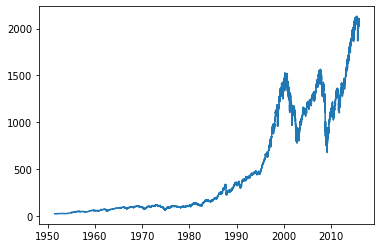

In [20]:
import matplotlib.pyplot as plt
plt.plot(df['Date'],df['Close'])
plt.show()

## Predictions
Firstly we divide the dataset in a `train` and `test` data. The `train` contains any rows in the data with a date less than 2013-01-01. `test` contains rows with date greater than or equal to 2013-01-01.

In [22]:
from datetime import datetime
train = df[df["Date"] < datetime(year=2013, month=1, day=1)]
test = df[df["Date"] >= datetime(year=2013, month=1, day=1)]

This plot shows the values of 'Close' and the first 2 calculated indicators (average price from the past 5 days & 365 days) 

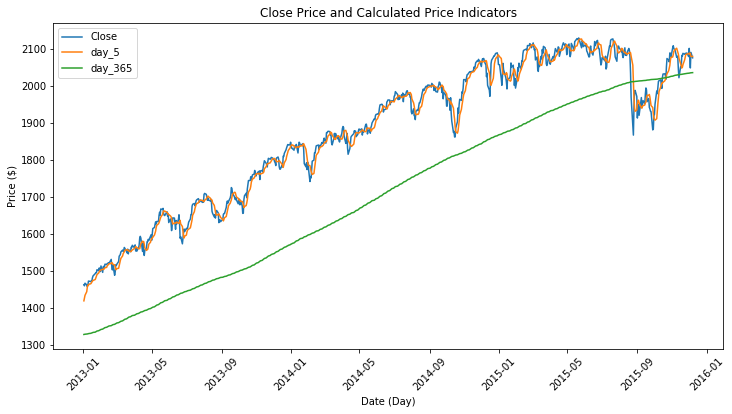

In [23]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()

plt.plot(test['Date'],test[['Close','day_5','day_365']])
plt.xticks(rotation=45)
ax.set_title('Close Price and Calculated Price Indicators')
ax.set_xlabel('Date (Day)')
ax.set_ylabel('Price ($)')
plt.legend(['Close','day_5','day_365','ratio_5_365','std_5'])
plt.show()

For our error metrix we choose the Mean Absolute Error, also called MAE, because it will show you how "close" we were to the price in intuitive terms. 

We train a linear regression model, using the train Dataframe and leave out all of the original columns ('Close', 'High', 'Low', 'Open', 'Volume', 'Adj Close', 'Date') when training the model, as these contain knowledge of the future that we don't want to feed the model. 'Close' is the target column.

To compare the models, I trained/predicted using different sets of features:
1. 'day_5'
2. 'day_365'
3. 'ratio_5_365'
4. 'std_5'

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

feature_columns = ['day_5','day_365','ratio_5_365','std_5']
target_column = ['Close']

used_features = []
mae_list = []
for indicator in feature_columns:
    used_features = [indicator]
    
    model = LinearRegression()
    model.fit(train[used_features], train[target_column])

    predictions = model.predict(test[used_features])

    mae = mean_absolute_error(test[target_column], predictions)
    mae_list.append(mae)

mae_list

[16.267878754475817,
 146.63130206869414,
 1447.9475623581754,
 1005.6260480135944]

We can see that, besides 'day_5' all other indicators lead to high MAEs. This has probably to do with the fact that 'day_5' offers a better grasp of the price tendencies (moving average) in a reasonable time window. Now I add the other indicators sequentially to check possible improvements they can add to the MAE

1. 'day_5'
2. 'day_5','day_365'
3. 'day_5','day_365','ratio_5_365'
4. 'day_5','day_365','ratio_5_365','std_5'

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

feature_columns = ['day_5','day_365','ratio_5_365','std_5']
target_column = ['Close']

used_features = []
mae_list = []
for indicator in feature_columns:
    used_features.append(indicator)
    
    model = LinearRegression()
    model.fit(train[used_features], train[target_column])

    predictions = model.predict(test[used_features])

    mae = mean_absolute_error(test[target_column], predictions)
    mae_list.append(mae)

mae_list

[16.267878754475817,
 16.130387692897774,
 16.125519160928263,
 16.093177677833147]

We see that adding more indicators reduce slightly the MAE.

## Further Steps

* Try further indicators. E.g. The day of week, The average volume over the past year, The standard deviation of the average volume over the past year...
* Trying day-ahead predictions
* Incorporate outside data